<h1> The Challenge:</h1>

Based off this dataset with school financial, enrollment, and achievement data, we are interested in what information is a useful indicator of student performance at the state level.

This question is a bit too big for a checkpoint, however. Instead, we want you to look at smaller questions related to our overall goal. Here's the overview:

1. Choose a specific test to focus on
>Math/Reading for 4/8 grade
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create 2 well-labeled visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Pick if you want to do a regression or classification task. For both cases, defined _exactly_ what you want to predict, and pick any model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a> and <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">classifiers</a>).
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

** Include comments throughout your code! Every cleanup and preprocessing task should be documented.


Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# feel free to import other libraries! 

In [67]:
df = pd.read_csv('../data/states_edu.csv')
df

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,2019_VIRGINIA,VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,247.0,287.0,224.0,262.0
1711,2019_WASHINGTON,WASHINGTON,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,240.0,286.0,220.0,266.0
1712,2019_WEST_VIRGINIA,WEST_VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,231.0,272.0,213.0,256.0
1713,2019_WISCONSIN,WISCONSIN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,242.0,289.0,220.0,267.0


Chosen test: Math for 4 grade

<h2> Cleanup (optional)</h2>

_Use this space to rename columns, deal with missing data, etc._

In [68]:
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)
print(df.columns)
# drop rows that has no record on math 4
df.dropna(subset=['AVG_MATH_4_SCORE'], inplace=True)
# fill nan data in other columns with mean
cols = ['TOTAL_REVENUE','FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'ENROLL_PREK', 'ENROLL_KINDER',
       'ENROLL_4', 'ENROLL_8', 'ENROLL_12', 'ENROLL_PRIMARY', 'ENROLL_HS',
       'ENROLL_ALL', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE']
for col in cols:
    df[col].fillna(value=df[col].mean(), inplace=True)
n = df.shape[0]
print(n)

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL_ALL_EST', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'ENROLL_PREK', 'ENROLL_KINDER',
       'ENROLL_4', 'ENROLL_8', 'ENROLL_12', 'ENROLL_PRIMARY', 'ENROLL_HS',
       'ENROLL_ALL', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')
565


<h2> Feature Selection </h2>
Since each state has different number of students, it shall be reasonable to average revenue adn expenditure on per student scope. In order to consider more predictors, each revenue and expenditure will be divided by the number of enrollment. This will make the total value redundant.

In [69]:
# federal revenue per student
df['FEDERAL_REVENUE_PER_STUDENT'] = df['FEDERAL_REVENUE'] / df['ENROLL_ALL']
# state revenue per student
df['STATE_REVENUE_PER_STUDENT'] = df['STATE_REVENUE'] / df['ENROLL_ALL']
# local revenue per student
df['LOCAL_REVENUE_PER_STUDENT'] = df['LOCAL_REVENUE'] / df['ENROLL_ALL']

# instruction expenditure per student
df['INSTRUCTION_EXPENDITURE_PER_STUDENT'] = df['INSTRUCTION_EXPENDITURE'] / df['ENROLL_ALL']
# support services expenditure per student
df['SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT'] = df['SUPPORT_SERVICES_EXPENDITURE'] / df['ENROLL_ALL']
# other expenditure per student
df['OTHER_EXPENDITURE_PER_STUDENT'] = df['OTHER_EXPENDITURE'] / df['ENROLL_ALL']
# capital layout expenditure per student
df['CAPITAL_OUTLAY_EXPENDITURE_PER_STUDENT'] = df['CAPITAL_OUTLAY_EXPENDITURE'] / df['ENROLL_ALL']

Final feature list:\[\
FEDERAL_REVENUE_PER_STUDENT,\
STATE_REVENUE_PER_STUDENT,\
LOCAL_REVENUE_PER_STUDENT,\
INSTRUCTION_EXPENDITURE_PER_STUDENT,\
SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT,\
OTHER_EXPENDITURE_PER_STUDENT,\
CAPITAL_OUTLAY_EXPENDITURE_PER_STUDENT,\
ENROLL_PREK,\
ENROLL_KINDER,\
ENROLL_4,\
ENROLL_8,\
ENROLL_12,\
ENROLL_PRIMARY,\
ENROLL_HS\
\]

Feature selection justification: the revenues and expenditures are combined value of each revenue or expenditure with the total enrollment number, so they can provide more information for the model. Since we have covered all detailed revenue and expediture, the total revenue and expenditure are simply linear combination of above predictors, making total values redundant. Same happens for ENROLL_ALL.

<h2> EDA </h2>

Visualization 1

Text(0.5, 1.0, 'Distribution of 4th grade math scores')

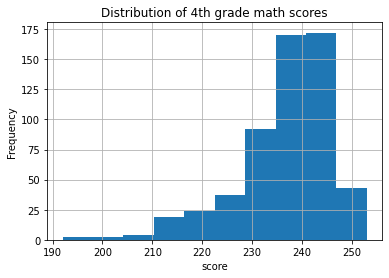

In [70]:
df['AVG_MATH_4_SCORE'].hist()
plt.xlabel('score')
plt.ylabel('Frequency')
plt.title('Distribution of 4th grade math scores')

Distribution of 4th grade math scores

Visualization 2

<AxesSubplot:xlabel='CAPITAL_OUTLAY_EXPENDITURE_PER_STUDENT', ylabel='AVG_MATH_4_SCORE'>

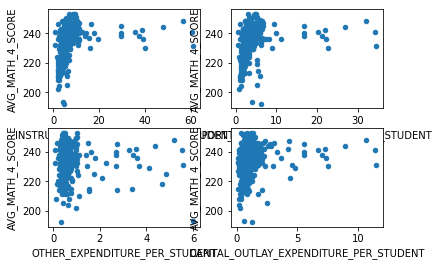

In [71]:
f, axes = plt.subplots(2,2)
df.plot.scatter(x='INSTRUCTION_EXPENDITURE_PER_STUDENT',y='AVG_MATH_4_SCORE', ax=axes[0,0])
df.plot.scatter(x='SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT',y='AVG_MATH_4_SCORE', ax=axes[0,1])
df.plot.scatter(x='OTHER_EXPENDITURE_PER_STUDENT',y='AVG_MATH_4_SCORE', ax=axes[1,0])
df.plot.scatter(x='CAPITAL_OUTLAY_EXPENDITURE_PER_STUDENT',y='AVG_MATH_4_SCORE', ax=axes[1,1])

4th grade math scores regarding Four kinds of expenditure

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
X = df[['FEDERAL_REVENUE_PER_STUDENT',
        'STATE_REVENUE_PER_STUDENT',
        'LOCAL_REVENUE_PER_STUDENT',
        'INSTRUCTION_EXPENDITURE_PER_STUDENT',
        'SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT',
        'OTHER_EXPENDITURE_PER_STUDENT',
        'CAPITAL_OUTLAY_EXPENDITURE_PER_STUDENT',
        'ENROLL_PREK',
        'ENROLL_KINDER',
        'ENROLL_4',
        'ENROLL_8',
        'ENROLL_12',
        'ENROLL_PRIMARY',
        'ENROLL_HS']]
y = df['AVG_MATH_4_SCORE']

In [74]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=int(n * 0.2), random_state=0)

<h2> Prediction </h2>

Chosen ML task: regression

In [75]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [76]:
# create your model here
model = LinearRegression()

In [77]:
model.fit(X_train, y_train)
print(model.intercept_)
print(model.coef_)
model.score(X_test, y_test)
np.mean((model.predict(X_test)-y_test)**2)**0.5

236.6493180393963
[-2.73623074e+00  1.15601010e+00  5.32341155e-01  1.54313880e+00
 -3.39823503e+00 -4.72079224e+00 -6.23208482e-01  1.67979367e-04
 -1.63783756e-05 -4.79347398e-04  2.00619197e-04  3.39710126e-04
  2.08502099e-06 -2.03950711e-05]


6.952764328976238

In [78]:
y_pred = model.predict(X_test)

In [79]:
# FOR CLASSIFICATION ONLY:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test, y_test,
                         cmap=plt.cm.Blues)

ValueError: plot_confusion_matrix only supports classifiers

Text(0, 0.5, 'Math 4 score')

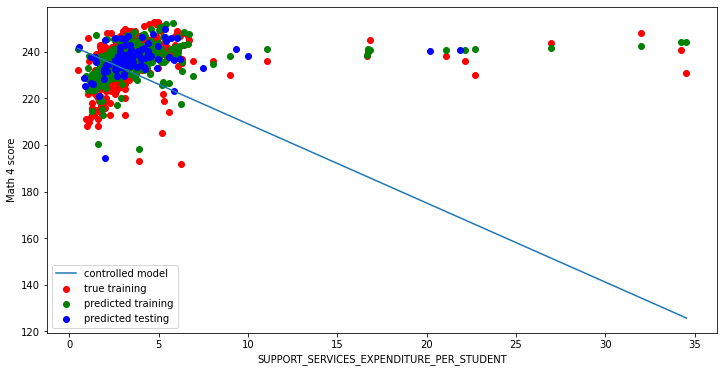

In [80]:
# FOR REGRESSION ONLY: (pick a single column to visualize results)

# Results from this graph _should not_ be used as a part of your results -- it is just here to help with intuition. 
# Instead, look at the error values and individual intercepts.


col_name = 'SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT'
col_index = X_train.columns.get_loc(col_name)

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
plt.scatter(X_test[col_name], model.predict(X_test), color = "blue")

new_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),200)
intercept = model.predict([X_train.sort_values(col_name).iloc[0]]) - X_train[col_name].min()*model.coef_[col_index]
plt.plot(new_x, intercept+new_x*model.coef_[col_index])

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Math 4 score')

<h2> Summary </h2>

+ The test is regarding how the average 4th grade math score is influenced.
+ The dataset has many NaN values. So the first step is to clean the data. Since no record of 4th grade math score will notgive any information, those rows are dropped first. For the remaining rows, if a cell has NaN, it will be replaced by the mean of that column (predictor). 
+ For feature selection, revenue, expenditure and enrollment information is covered in the model.
The AVG_MATH_4_GRADES data is visualized to show its distribution. Also, the scatter plot of all expenditure is visualized.
+ Finally, the model is fitted by linear regression
Some thinking about the result:
+ Since we can use F-statstics to test the significance of a predictor, can be use it to filter predictors in the feature selection area?
+ The final visualization plot for MATH_4_SCORE and SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT does not appear to have linear relationship as I expected to (like a line across the majority of the points). But it seems like these values are predicted well, which poses some confusion.
